<h1 style="color:mediumslateblue">QUESTION 1: OCCUPATIONS</h1>

<h2><span style="color:darkcyan">STEP 1:</span> <span style="color:darkseagreen">Import the necessary libraries</span></h2>

In [1]:
import pandas as pd
import numpy as np

<h2><span style="color:darkcyan">STEP 2:</span> <span style="color:darkseagreen">Import the dataset from this</span> <span style="color:thisle"><a href="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user">address</a></span></h2>

In [2]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user'
users = pd.read_csv(url, sep='|')

<h2><span style="color:darkcyan">STEP 3:</span> <span style="color:darkseagreen">Assign it to a variable called users</span></h2>

In [3]:
users = pd.read_csv(url, sep='|')

<h2><span style="color:darkcyan">STEP 4:</span> <span style="color:darkseagreen">Discover what is the mean age per occupation</span></h2>

In [4]:
mean_age_by_occupation = users.groupby('occupation')['age'].mean()
print(mean_age_by_occupation)

occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketing        37.615385
none             26.555556
other            34.523810
programmer       33.121212
retired          63.071429
salesman         35.666667
scientist        35.548387
student          22.081633
technician       33.148148
writer           36.311111
Name: age, dtype: float64


<h2><span style="color:darkcyan">STEP 5:</span> <span style="color:darkseagreen">Discover the Male ratio per occupation and sort it from the most to the least</span></h2>

In [5]:
users['gender_num'] = users['gender'].apply(lambda x: 1 if x == 'M' else 0)
#A new column 'gender_num' with 1 for Male and 0 for Female has been created

male_ratio_by_occupation = users.groupby('occupation')['gender_num'].mean()

male_ratio_by_occupation.sort_values(ascending=False, inplace=True)

print(male_ratio_by_occupation)

occupation
doctor           1.000000
engineer         0.970149
technician       0.962963
retired          0.928571
programmer       0.909091
executive        0.906250
scientist        0.903226
entertainment    0.888889
lawyer           0.833333
salesman         0.750000
educator         0.726316
student          0.693878
other            0.657143
marketing        0.615385
writer           0.577778
none             0.555556
administrator    0.544304
artist           0.535714
librarian        0.431373
healthcare       0.312500
homemaker        0.142857
Name: gender_num, dtype: float64


<h2><span style="color:darkcyan">STEP 6:</span> <span style="color:darkseagreen">For each occupation, calculate the minimum and maximum ages</span></h2>

In [6]:
age_range_by_occupation = users.groupby('occupation')['age'].agg(['min', 'max'])

print(age_range_by_occupation)

               min  max
occupation             
administrator   21   70
artist          19   48
doctor          28   64
educator        23   63
engineer        22   70
entertainment   15   50
executive       22   69
healthcare      22   62
homemaker       20   50
lawyer          21   53
librarian       23   69
marketing       24   55
none            11   55
other           13   64
programmer      20   63
retired         51   73
salesman        18   66
scientist       23   55
student          7   42
technician      21   55
writer          18   60


<h2><span style="color:darkcyan">STEP 7:</span> <span style="color:darkseagreen">For each combination of occupation and sex, calculate the mean age</span></h2>

In [7]:
mean_age_by_occupation_gender = users.groupby(['occupation', 'gender'])['age'].mean()

print(mean_age_by_occupation_gender)

occupation     gender
administrator  F         40.638889
               M         37.162791
artist         F         30.307692
               M         32.333333
doctor         M         43.571429
educator       F         39.115385
               M         43.101449
engineer       F         29.500000
               M         36.600000
entertainment  F         31.000000
               M         29.000000
executive      F         44.000000
               M         38.172414
healthcare     F         39.818182
               M         45.400000
homemaker      F         34.166667
               M         23.000000
lawyer         F         39.500000
               M         36.200000
librarian      F         40.000000
               M         40.000000
marketing      F         37.200000
               M         37.875000
none           F         36.500000
               M         18.600000
other          F         35.472222
               M         34.028986
programmer     F         32.16666

<h2><span style="color:darkcyan">STEP 8:</span> <span style="color:darkseagreen">For each occupation present the percentage of women and men</span></h2>

In [8]:
total_by_occupation = users.groupby('occupation')['gender'].count()

male_by_occupation = users.groupby('occupation')['gender_num'].sum()

percentage_by_occupation = (male_by_occupation / total_by_occupation) * 100
percentage_by_occupation = pd.concat([percentage_by_occupation, 100-percentage_by_occupation], axis=1)
percentage_by_occupation.columns = ['Male', 'Female']

print(percentage_by_occupation)

                     Male     Female
occupation                          
administrator   54.430380  45.569620
artist          53.571429  46.428571
doctor         100.000000   0.000000
educator        72.631579  27.368421
engineer        97.014925   2.985075
entertainment   88.888889  11.111111
executive       90.625000   9.375000
healthcare      31.250000  68.750000
homemaker       14.285714  85.714286
lawyer          83.333333  16.666667
librarian       43.137255  56.862745
marketing       61.538462  38.461538
none            55.555556  44.444444
other           65.714286  34.285714
programmer      90.909091   9.090909
retired         92.857143   7.142857
salesman        75.000000  25.000000
scientist       90.322581   9.677419
student         69.387755  30.612245
technician      96.296296   3.703704
writer          57.777778  42.222222


<h1 style="color:mediumslateblue">QUESTION 2: EURO TEAMS</h1>

<h2><span style="color:darkcyan">STEP 1:</span> <span style="color:darkseagreen">Import the necessary libraries</span></h2>

In [9]:
import pandas as pd
import numpy as np

<h2><span style="color:darkcyan">STEP 2:</span> <span style="color:darkseagreen">Import the dataset from this</span> <span style="color:thisle"><a href="https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv">address</a></span></h2>

In [10]:
url = 'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv'
euro12 = pd.read_csv(url)

<h2><span style="color:darkcyan">STEP 3:</span> <span style="color:darkseagreen">Assign it to a variable called euro12</span></h2>

In [11]:
euro12 = pd.read_csv(url)

<h2><span style="color:darkcyan">STEP 4:</span> <span style="color:darkseagreen">Select only the Goal column</span></h2>

In [12]:
goals = euro12['Goals']
print(goals)

0      4
1      4
2      4
3      5
4      3
5     10
6      5
7      6
8      2
9      2
10     6
11     1
12     5
13    12
14     5
15     2
Name: Goals, dtype: int64


<h2><span style="color:darkcyan">STEP 5:</span> <span style="color:darkseagreen">How many team participated in the Euro2012?</span></h2>

In [13]:
num_teams = euro12['Team'].nunique()
print(num_teams)

16


<h2><span style="color:darkcyan">STEP 6:</span> <span style="color:darkseagreen">What is the number of columns in the dataset?</span></h2>

In [14]:
num_columns = euro12.shape[1]
print(num_columns)

35


<h2><span style="color:darkcyan">STEP 7:</span> <span style="color:darkseagreen">View only the columns Team, Yellow Cards and Red Cards and assign them
to a dataframe called discipline</span></h2>

In [15]:
discipline = euro12[['Team', 'Yellow Cards', 'Red Cards']]
print(discipline)

                   Team  Yellow Cards  Red Cards
0               Croatia             9          0
1        Czech Republic             7          0
2               Denmark             4          0
3               England             5          0
4                France             6          0
5               Germany             4          0
6                Greece             9          1
7                 Italy            16          0
8           Netherlands             5          0
9                Poland             7          1
10             Portugal            12          0
11  Republic of Ireland             6          1
12               Russia             6          0
13                Spain            11          0
14               Sweden             7          0
15              Ukraine             5          0


<h2><span style="color:darkcyan">STEP 8:</span> <span style="color:darkseagreen">Sort the teams by Red Cards, then to Yellow Cards</span></h2>

In [16]:
discipline = discipline.sort_values(['Red Cards', 'Yellow Cards'], ascending=False)
print(discipline)

                   Team  Yellow Cards  Red Cards
6                Greece             9          1
9                Poland             7          1
11  Republic of Ireland             6          1
7                 Italy            16          0
10             Portugal            12          0
13                Spain            11          0
0               Croatia             9          0
1        Czech Republic             7          0
14               Sweden             7          0
4                France             6          0
12               Russia             6          0
3               England             5          0
8           Netherlands             5          0
15              Ukraine             5          0
2               Denmark             4          0
5               Germany             4          0


<h2><span style="color:darkcyan">STEP 9:</span> <span style="color:darkseagreen">Calculate the mean Yellow Cards given per Team</span></h2>

In [17]:
mean_yellow_cards = euro12['Yellow Cards'].mean()
print(mean_yellow_cards)

7.4375


<h2><span style="color:darkcyan">STEP 10:</span> <span style="color:darkseagreen">Filter teams that scored more than 6 goalsStep</span></h2>

In [18]:
high_scoring_teams = euro12[euro12['Goals'] > 6]['Team']
print(high_scoring_teams)

5     Germany
13      Spain
Name: Team, dtype: object


<h2><span style="color:darkcyan">STEP 11:</span> <span style="color:darkseagreen">Select the teams that start
with G</span></h2>

In [19]:
g_teams = euro12[euro12['Team'].str.startswith('G')]
print(g_teams)
#To generate a table-format output without assigning the 'g_teams' variable, one can directly write the code.

      Team  Goals  Shots on target  Shots off target Shooting Accuracy  \
5  Germany     10               32                32             47.8%   
6   Greece      5                8                18             30.7%   

  % Goals-to-shots  Total shots (inc. Blocked)  Hit Woodwork  Penalty goals  \
5            15.6%                          80             2              1   
6            19.2%                          32             1              1   

   Penalties not scored  ...  Saves made  Saves-to-shots ratio  Fouls Won  \
5                     0  ...          10                 62.6%         63   
6                     1  ...          13                 65.1%         67   

  Fouls Conceded  Offsides  Yellow Cards  Red Cards  Subs on  Subs off  \
5             49        12             4          0       15        15   
6             48        12             9          1       12        12   

   Players Used  
5            17  
6            20  

[2 rows x 35 columns]


<h2><span style="color:darkcyan">STEP 12:</span> <span style="color:darkseagreen"> Select the first 7 columns</span></h2>

In [20]:
first_seven_columns = euro12.iloc[:, :7]
print(first_seven_columns)
#To generate a table-format output without assigning the 'first_seven_columns' variable, one can directly write the code.

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

<h2><span style="color:darkcyan">STEP 13:</span> <span style="color:darkseagreen">Select all columns except the last 3</span></h2>

In [21]:
all_except_last_three_columns = euro12.iloc[:, :-3]
print(all_except_last_three_columns)
#To generate a table-format output without assigning the 'all_except_last_three_columns' variable, one can directly write the code.

                   Team  Goals  Shots on target  Shots off target  \
0               Croatia      4               13                12   
1        Czech Republic      4               13                18   
2               Denmark      4               10                10   
3               England      5               11                18   
4                France      3               22                24   
5               Germany     10               32                32   
6                Greece      5                8                18   
7                 Italy      6               34                45   
8           Netherlands      2               12                36   
9                Poland      2               15                23   
10             Portugal      6               22                42   
11  Republic of Ireland      1                7                12   
12               Russia      5                9                31   
13                Spain     12    

<h2><span style="color:darkcyan">STEP 14:</span> <span style="color:darkseagreen">Present only the Shooting Accuracy from England, Italy and Russia</span></h2>

In [22]:
accuracy = euro12.loc[euro12['Team'].isin(['England', 'Italy', 'Russia']), ['Team', 'Shooting Accuracy']]
print(accuracy)

       Team Shooting Accuracy
3   England             50.0%
7     Italy             43.0%
12   Russia             22.5%


<h1 style="color:mediumslateblue">QUESTION 3: HOUSING</h1>

<h2><span style="color:darkcyan">STEP 1:</span> <span style="color:darkseagreen">Import the necessary libraries</span></h2>

In [23]:
import pandas as pd
import numpy as np

<h2><span style="color:darkcyan">STEP 2:</span> <span style="color:darkseagreen">Create 3 differents Series, each of length 100</span></h2>

In [24]:
series_1 = pd.Series(np.random.randint(1, 5, 100))
print(series_1.head())
series_2 = pd.Series(np.random.randint(1, 4, 100))
print(series_2.head())
series_3 = pd.Series(np.random.randint(10000, 30001, 100))
print(series_3.head())

0    4
1    2
2    3
3    1
4    2
dtype: int32
0    3
1    1
2    2
3    2
4    1
dtype: int32
0    22337
1    12534
2    14644
3    20612
4    15744
dtype: int32


<h2><span style="color:darkcyan">STEP 3:</span> <span style="color:darkseagreen">Create a DataFrame by joinning the Series by column</span></h2>

In [25]:
df = pd.concat([series_1, series_2, series_3], axis=1)
print(df.head())

   0  1      2
0  4  3  22337
1  2  1  12534
2  3  2  14644
3  1  2  20612
4  2  1  15744


<h2><span style="color:darkcyan">STEP 4:</span> <span style="color:darkseagreen">Change the name of the columns to bedrs, bathrs, price_sqr_meter</span></h2>

In [26]:
df.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
print(df.head())

   bedrs  bathrs  price_sqr_meter
0      4       3            22337
1      2       1            12534
2      3       2            14644
3      1       2            20612
4      2       1            15744


<h2><span style="color:darkcyan">STEP 5:</span> <span style="color:darkseagreen">Create a one column DataFrame with the values of the 3 Series and assign it
to 'bigcolumn'</span></h2>

In [27]:
bigcolumn = pd.concat([series_1, series_2, series_3], ignore_index=True)
bigcolumn = pd.DataFrame(bigcolumn)
print(bigcolumn.head())

   0
0  4
1  2
2  3
3  1
4  2


<h2><span style="color:darkcyan">STEP 6:</span> <span style="color:darkseagreen">Oops it seems it is going only until index 99. Is it true?</span></h2>

In [28]:
print(len(bigcolumn) == 100)

False


<h2><span style="color:darkcyan">STEP 7:</span> <span style="color:darkseagreen">Reindex the DataFrame so it goes from 0 to 299</span></h2>

In [29]:
bigcolumn = pd.concat([series_1, series_2, series_3], ignore_index=True)
bigcolumn = pd.DataFrame(bigcolumn)
bigcolumn = bigcolumn.reset_index(drop=True)
print(bigcolumn.head())

   0
0  4
1  2
2  3
3  1
4  2


<h1 style="color:mediumslateblue">QUESTION 4: WIND STATISTICS</h1>

<h2 style="color:darkcyan">STEP 1 to STEP 15</h2>

In [30]:
# Step 1: Import the necessary libraries
import pandas as pd
import numpy as np

# Step 2: Import the dataset from the attached file wind.txt
data = pd.read_csv('wind.txt', delim_whitespace=True, na_values='NaN')

# Step 3: Assign it to a variable called data and replace the first 3 columns by a proper datetime index.
data['date'] = data[['Yr', 'Mo', 'Dy']].apply(lambda x: '{:02d}{:02d}{:02d}'.format(x[0],x[1],x[2]), axis=1)
data.drop(columns=['Yr', 'Mo', 'Dy'], inplace=True)
data.set_index('date', inplace=True)

# Step 4: Fix the year in the datetime index
data.index = pd.to_datetime(data.index, format='%y%m%d')
data.index = data.index.map(lambda date: date.replace(year=date.year + 100) if date.year < 1970 else date)

# Step 5: Set the right dates as the index.
data.index = pd.to_datetime(data.index)

# Step 6: Compute how many values are missing for each location over the entire record.
missing_values = data.isna().sum()
print("Missing Values for each location:\n", missing_values)

# Step 7: Compute how many non-missing values there are in total.
non_missing_values = data.notna().sum().sum()
print("\nTotal number of non-missing values:", non_missing_values)

# Step 8: Calculate the mean windspeeds of the windspeeds over all the locations and all the times.
mean_windspeed = data.mean().mean()
print("\nMean windspeed over all the locations and all the times:", mean_windspeed)

# Step 9: Create a DataFrame called loc_stats and calculate the min, max and mean windspeeds and standard deviations of the windspeeds at each location over all the days.
loc_stats = pd.DataFrame()
loc_stats['min'] = data.min()
loc_stats['max'] = data.max()
loc_stats['mean'] = data.mean()
loc_stats['std'] = data.std()
print("\nLocation Statistics:\n", loc_stats)

# Step 10: Create a DataFrame called day_stats and calculate the min, max and mean windspeed and standard deviations of the windspeeds across all the locations at each day.
day_stats = pd.DataFrame()
day_stats['min'] = data.min(axis=1)
day_stats['max'] = data.max(axis=1)
day_stats['mean'] = data.mean(axis=1)
day_stats['std'] = data.std(axis=1)
print("\nDay Statistics:\n", day_stats)

# Step 11: Find the average windspeed in January for each location.
january_data = data[data.index.month == 1]
january_data_mean = january_data.mean()
print("\nAverage windspeed in January for each location:\n", january_data_mean)

# Step 12: Downsample the record to a yearly frequency for each location.
yearly_data = data.resample('Y').mean()
print("\nYearly Frequency for each location:\n", yearly_data)

# Step 13: Downsample the record to a monthly frequency for each location.
monthly_data = data.resample('M').mean()
print("\nMonthly Frequency for each location:\n", monthly_data)

# Step 14: Downsample the record to a weekly frequency for each location.
weekly_data = data.resample('W').mean()
print("\nWeekly Frequency for each location:\n", weekly_data)


# Step 15: Calculate the min, max and mean windspeeds and standard deviations of the windspeeds across all locations for each week (assume that the first week starts on January 2 1961) for the first 52 weeks.

start_date = '1961-01-02'
end_date = '1961-12-25'
#The start and end dates for the first 52 weeks has been calculated

weekly_data = data.resample('W', closed='left', label='left').mean()

weekly_data_first_year = weekly_data.loc[start_date:end_date]

weekly_stats = pd.DataFrame()
weekly_stats['min'] = weekly_data_first_year.min(axis=1)
weekly_stats['max'] = weekly_data_first_year.max(axis=1)
weekly_stats['mean'] = weekly_data_first_year.mean(axis=1)
weekly_stats['std'] = weekly_data_first_year.std(axis=1)

print("Weekly Stats for the First 52 Weeks of Data:")
print(weekly_stats.head(52))

Missing Values for each location:
 RPT    6
VAL    3
ROS    2
KIL    5
SHA    2
BIR    0
DUB    3
CLA    2
MUL    3
CLO    1
BEL    0
MAL    4
dtype: int64

Total number of non-missing values: 78857

Mean windspeed over all the locations and all the times: 10.227982360836924

Location Statistics:
       min    max       mean       std
RPT  0.67  35.80  12.362987  5.618413
VAL  0.21  33.37  10.644314  5.267356
ROS  1.50  33.84  11.660526  5.008450
KIL  0.00  28.46   6.306468  3.605811
SHA  0.13  37.54  10.455834  4.936125
BIR  0.00  26.16   7.092254  3.968683
DUB  0.00  30.37   9.797343  4.977555
CLA  0.00  31.08   8.495053  4.499449
MUL  0.00  25.88   8.493590  4.166872
CLO  0.04  28.21   8.707332  4.503954
BEL  0.13  42.38  13.121007  5.835037
MAL  0.67  42.54  15.599079  6.699794

Day Statistics:
              min    max       mean       std
date                                        
2061-01-01  9.29  18.50  13.018182  2.808875
2061-01-02  6.50  17.54  11.336364  3.188994
2061-01-0

<h1 style="color:mediumslateblue">QUESTION 5: CHIPOTLE'S SALES DATA</h1>

<h2 style="color:darkcyan">STEP 1 to STEP 4</h2>

In [31]:
# Step 1. Import the necessary libraries
import pandas as pd

# Step 2. Import the dataset from the given address
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
chipo = pd.read_csv(url, delimiter='\t')

# Step 3. Assign it to a variable called chipo

# Step 4. See the first 10 entries
print(chipo.head(10))

   order_id  quantity                              item_name  \
0         1         1           Chips and Fresh Tomato Salsa   
1         1         1                                   Izze   
2         1         1                       Nantucket Nectar   
3         1         1  Chips and Tomatillo-Green Chili Salsa   
4         2         2                           Chicken Bowl   
5         3         1                           Chicken Bowl   
6         3         1                          Side of Chips   
7         4         1                          Steak Burrito   
8         4         1                       Steak Soft Tacos   
9         5         1                          Steak Burrito   

                                  choice_description item_price  
0                                                NaN     $2.39   
1                                       [Clementine]     $3.39   
2                                            [Apple]     $3.39   
3                              

<h2 style="color:darkcyan">STEP 5 to STEP 17</h2>

In [32]:
# Step 5. What is the number of observations in the dataset?
print("Number of observations:", len(chipo))

# Step 6. What is the number of columns in the dataset?
print("Number of columns:", len(chipo.columns))

# Step 7. Print the name of all the columns.
print("Columns:", chipo.columns)

# Step 8. How is the dataset indexed?
print("Index:", chipo.index)

# Step 9. Which was the most-ordered item?
item_count = chipo.groupby("item_name")["quantity"].sum().sort_values(ascending=False)
print("Most-ordered item:", item_count.index[0])

# Step 10. For the most-ordered item, how many items were ordered?
print("Number of ordered items:", item_count.iloc[0])

# Step 11. What was the most ordered item in the choice_description column?
choice_count = chipo.groupby("choice_description")["quantity"].sum().sort_values(ascending=False)
print("Most ordered item in choice_description:", choice_count.index[0])

# Step 12. How many items were ordered in total?
print("Total number of ordered items:", chipo["quantity"].sum())

# Step 13.
# Turn the item price into a float
chipo["item_price"] = chipo["item_price"].apply(lambda x: float(x[1:]))
# Check the item price type
print("Type of item_price after conversion:", chipo["item_price"].dtype)

# Step 14. How much was the revenue for the period in the dataset?
revenue = (chipo["quantity"] * chipo["item_price"]).sum()
print("Total revenue:", revenue)

# Step 15. How many orders were made in the period?
num_orders = chipo["order_id"].nunique()
print("Number of orders:", num_orders)

# Step 16. What is the average revenue amount per order?
avg_rev_per_order = revenue / num_orders
print("Average revenue per order:", avg_rev_per_order)

# Step 17. How many different items are sold?
num_items = chipo["item_name"].nunique()
print("Number of different items sold:", num_items)

Number of observations: 4622
Number of columns: 5
Columns: Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
Index: RangeIndex(start=0, stop=4622, step=1)
Most-ordered item: Chicken Bowl
Number of ordered items: 761
Most ordered item in choice_description: [Diet Coke]
Total number of ordered items: 4972
Type of item_price after conversion: float64
Total revenue: 39237.02
Number of orders: 1834
Average revenue per order: 21.39423118865867
Number of different items sold: 50


<h1 style="color:mediumslateblue">QUESTION 6: U.S. MARRIAGES AND DIVORCES</h1>

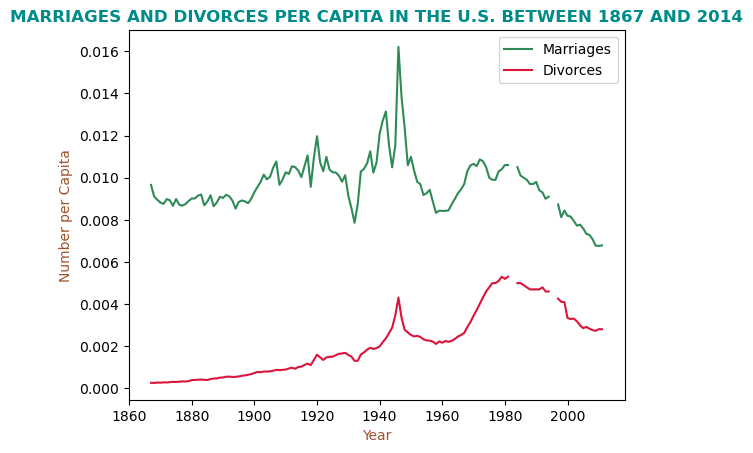

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

df['Marriages per Capita'] = df['Marriages'] / df['Population']

df['Divorces per Capita'] = df['Divorces'] / df['Population']

plt.plot(df['Year'], df['Marriages per Capita'], label='Marriages', color='seagreen')
plt.plot(df['Year'], df['Divorces per Capita'], label='Divorces', color='crimson')


plt.xlabel('Year', color='sienna')
plt.ylabel('Number per Capita', color='sienna')
           
plt.title('MARRIAGES AND DIVORCES PER CAPITA IN THE U.S. BETWEEN 1867 AND 2014', color='darkcyan', fontweight='bold')
plt.legend()

plt.show()

<h1 style="color:mediumslateblue">QUESTION 7: U.S. MARRIAGES AND DIVORCESS</h1>

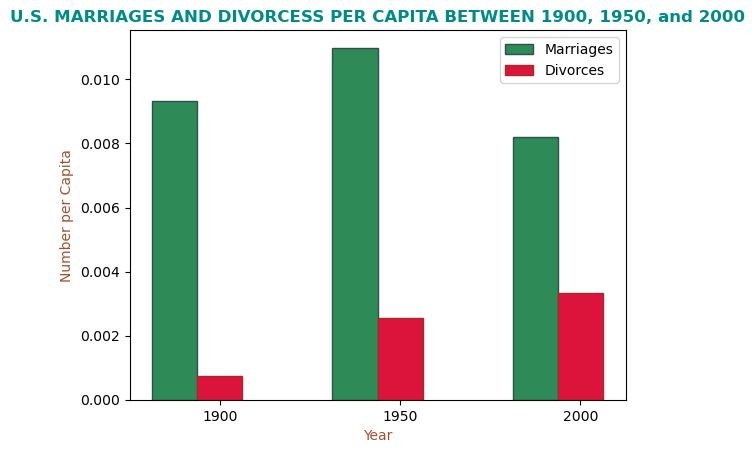

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('us-marriages-divorces-1867-2014.csv')

df = df[df['Year'].isin([1900, 1950, 2000])]

df['Marriages per Capita'] = df['Marriages'] / df['Population']

df['Divorces per Capita'] = df['Divorces'] / df['Population']

barWidth = 0.25
r1 = [1, 2, 3]
r2 = [x + barWidth for x in r1]
plt.bar(r1, df['Marriages per Capita'], color='seagreen', width=barWidth, edgecolor='darkslategrey', label='Marriages')
plt.bar(r2, df['Divorces per Capita'], color='crimson', width=barWidth, edgecolor='brown', label='Divorces')

plt.xlabel('Year', color='sienna')
plt.ylabel('Number per Capita', color='sienna')
plt.title('U.S. MARRIAGES AND DIVORCESS PER CAPITA BETWEEN 1900, 1950, and 2000', color='darkcyan', fontweight='bold')
plt.xticks([1.25, 2.25, 3.25], ['1900', '1950', '2000'])
plt.legend()

plt.show()

<h1 style="color:mediumslateblue">QUESTION 8: HOLLYWOOD'S DEADLIEST ACTORS</h1>

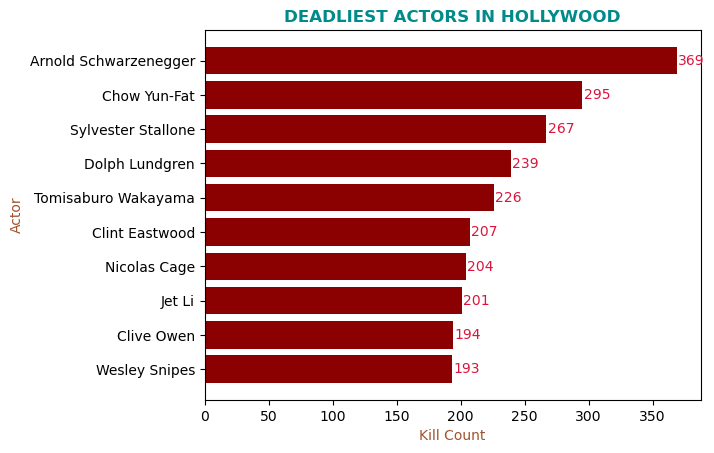

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('actor_kill_counts.csv')

df = df.sort_values(by=['Count'], ascending=True)

plt.barh(df['Actor'], df['Count'], color='darkred')

plt.xlabel('Kill Count', color='sienna')
plt.ylabel('Actor', color='sienna')
plt.title('DEADLIEST ACTORS IN HOLLYWOOD', color='darkcyan', fontweight='bold')

for i, v in enumerate(df['Count']):
    plt.text(v+1, i, str(v), color='crimson', va='center')

plt.show()

<h1 style="color:mediumslateblue">QUESTION 9: ROMAN EMPERORS</h1>

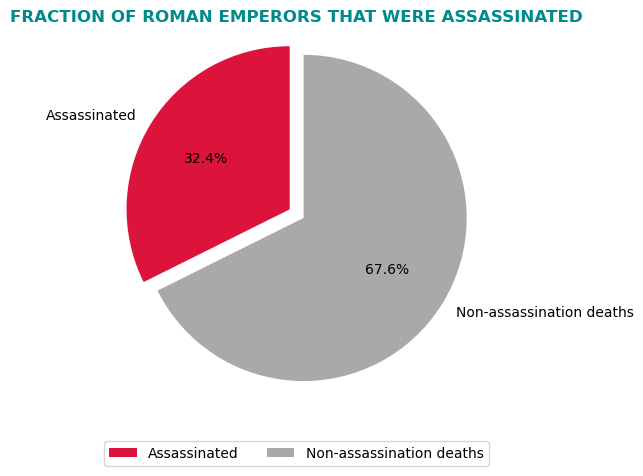

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('roman-emperor-reigns.csv')

assassinations = df[df['Cause_of_Death'] == 'Assassinated']['Emperor'].count()

non_assassinations = df.shape[0] - assassinations

labels = ['Assassinated', 'Non-assassination deaths']
sizes = [assassinations, non_assassinations]
colors = ['crimson', 'darkgrey']
explode = (0.1, 0)
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)

plt.title('FRACTION OF ROMAN EMPERORS THAT WERE ASSASSINATED', color= 'darkcyan', fontweight='bold')

plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.2), ncol=2)

plt.axis('equal')

plt.show()

<h1 style="color:mediumslateblue">QUESTION 10: U.S. ARCADE-PHD SCATTERPLOT</h1>

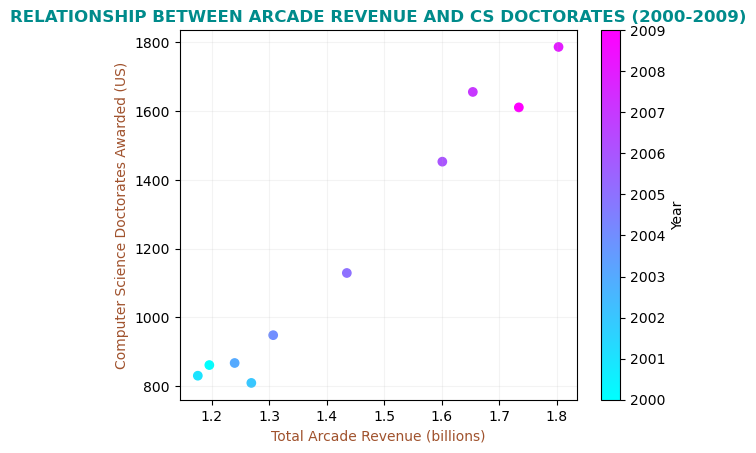

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')

df = df[(df['Year'] >= 2000) & (df['Year'] <= 2009)]

plt.scatter(df['Total Arcade Revenue (billions)'], df['Computer Science Doctorates Awarded (US)'], c=df['Year'], cmap='cool')

plt.xlabel('Total Arcade Revenue (billions)', color= 'sienna')
plt.ylabel('Computer Science Doctorates Awarded (US)', color= 'sienna')
plt.title('RELATIONSHIP BETWEEN ARCADE REVENUE AND CS DOCTORATES (2000-2009)',color= 'darkcyan', fontweight='bold')
plt.colorbar(label='Year')

plt.grid(alpha=0.15)

plt.show()